<a href="https://colab.research.google.com/github/ashutoshsinha25/pepcoding_FJP_DS/blob/main/ANN/FJP_DS_churn_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Pepcoders/Data-Science-January/main/ANN/Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
X = data.iloc[: , 3:13]
y = data.iloc[:,13]

In [7]:
geography = pd.get_dummies(X['Geography'] , drop_first = True)
gender = pd.get_dummies(X['Gender'] , drop_first = True)

In [8]:
X = pd.concat([X , geography , gender] , axis = 1)
X.drop(['Geography' , 'Gender'] , axis = 1 , inplace = True)

In [9]:
X.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix , accuracy_score 


import keras 
from keras.models import Sequential 
from keras.layers import Dense , Dropout

In [11]:
X_train , X_test , y_train , y_test  = train_test_split(X , y ,test_size = 0.3 , random_state = 42)

In [12]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [15]:
from tensorflow.keras import initializers

In [16]:
model = Sequential()
model.add(Dense(11 , activation = 'relu'))
model.add(Dense(100 , activation = 'relu' , kernel_initializer = initializers.HeUniform()))
model.add(Dense(50 ,activation = 'relu' , kernel_initializer = initializers.GlorotUniform()))
model.add(Dense(1 ,activation = 'sigmoid'))


model.compile(loss = 'binary_crossentropy' ,
              optimizer = 'AdaDelta',
              metrics = ['accuracy'])

In [17]:
history = model.fit(X_train , y_train , batch_size = 32, epochs = 50 , validation_split = 0.2)

Epoch 1/50
175/175 [==============================] - 2s 6ms/step - loss: 0.6057 - accuracy: 0.7032 - val_loss: 0.6003 - val_accuracy: 0.7171
Epoch 2/50
175/175 [==============================] - 1s 4ms/step - loss: 0.6010 - accuracy: 0.7121 - val_loss: 0.5957 - val_accuracy: 0.7236
Epoch 3/50
175/175 [==============================] - 1s 4ms/step - loss: 0.5964 - accuracy: 0.7204 - val_loss: 0.5914 - val_accuracy: 0.7300
Epoch 4/50
175/175 [==============================] - 1s 4ms/step - loss: 0.5921 - accuracy: 0.7277 - val_loss: 0.5872 - val_accuracy: 0.7336
Epoch 5/50
175/175 [==============================] - 1s 4ms/step - loss: 0.5880 - accuracy: 0.7354 - val_loss: 0.5833 - val_accuracy: 0.7400
Epoch 6/50
175/175 [==============================] - 1s 3ms/step - loss: 0.5841 - accuracy: 0.7411 - val_loss: 0.5795 - val_accuracy: 0.7457
Epoch 7/50
175/175 [==============================] - 1s 5ms/step - loss: 0.5804 - accuracy: 0.7454 - val_loss: 0.5760 - val_accuracy: 0.7457
Epoch 

In [19]:
print(history.history.keys())



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


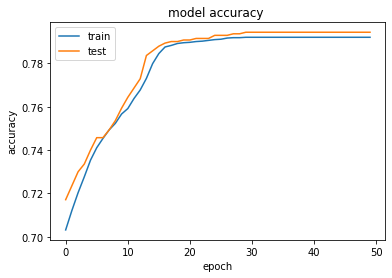

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train' , 'test'] , loc = 'upper left')
plt.show()

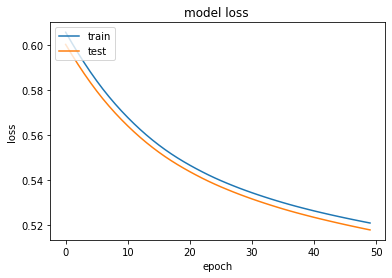

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss ')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train' , 'test'] , loc = 'upper left')
plt.show()

In [23]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [25]:
cm = confusion_matrix(y_test , y_pred)
cm

array([[2416,    0],
       [ 584,    0]])

In [26]:
score = accuracy_score(y_test , y_pred)
score

0.8053333333333333

In [27]:
model.save('model.h5')

In [29]:
# loading the model 
model2=keras.models.load_model('model.h5')

In [30]:
for layer in model.layers:
  print(layer.get_config() , layer.get_weights())

{'name': 'dense', 'trainable': True, 'dtype': 'float32', 'units': 11, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None} [array([[ 0.42489767,  0.06810131,  0.38527375,  0.135172  , -0.12137187,
         0.33905023,  0.30796233,  0.3023626 , -0.13320565,  0.49971387,
         0.00306252],
       [-0.4483703 , -0.47027877,  0.24957104,  0.518443  , -0.04978383,
        -0.22111589, -0.4211039 , -0.17404033,  0.3417476 , -0.4263739 ,
         0.31326166],
       [-0.11386498, -0.4552609 , -0.3036642 ,  0.22499321, -0.32834584,
         0.01306285, -0.06956012,  0.38415632, -0.24199784, -0.26718464,
         0.4221965 ],
       [ 0.0645429 ,  0.35851994, -0.12395323, -0.00364434, -0.03700521,
         0.38866007, -0.49351177,  0